In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
df = pd.read_csv('weight-height.csv')

In [ ]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [ ]:
df.shape

(10000, 3)

In [ ]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [ ]:
from sklearn.metrics import mean_squared_error as mse

Text(0, 0.5, 'Height')

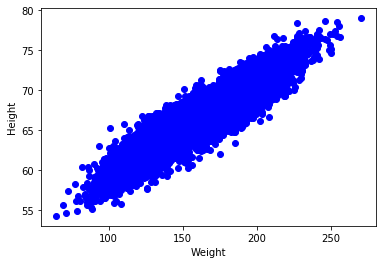

In [ ]:
plt.scatter(df.Weight, df.Height, color = 'blue')
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
def Error(Beta, df):

    b = 1.1
  
    Height = []
    Weight  = df.Weight
  
  
    for i in range(len(df.Weight)):
        tmp = df.Weight[i] * Beta + b
        Height.append(tmp)
    MSE = mse(df.Height, Height)
    return MSE

In [ ]:
slope = [i/10 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, df = df)
    Cost.append(cost)

In [ ]:
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : Cost
})
Cost_table.head(50)

,Beta,Cost
0,0.0,4274.656349
1,0.1,2415.384851
2,0.2,1097.990104
3,0.3,322.472109
4,0.4,88.830866
5,0.5,397.066374
6,0.6,1247.178633
7,0.7,2639.167644
8,0.8,4573.033407
9,0.9,7048.775921


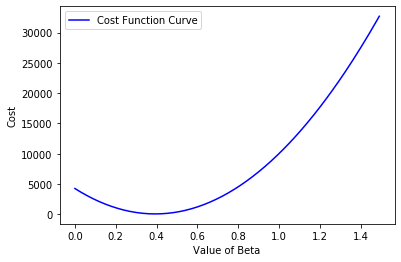

In [ ]:
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

In [ ]:
def estimate_coefficients(x, y):
    n = np.size(x)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    

    ss_xy = np.sum(y*x) - n*mean_y*mean_x
    ss_xx = np.sum(x*x) - n*mean_x*mean_x
    

    theta_1 = ss_xy/ss_xx
    theta_0 = mean_y - (theta_1*mean_x)
    

    return(theta_0, theta_1)


In [ ]:
def regression_line(x, y, theta):
    
    plt.scatter(x, y, marker='o', s=2, color='b')
    
   
    h = theta[0] + (theta[1] * x)
    
   
    plt.plot(x, h, color='r')
    
 
    plt.xlabel('x (Height)')
    plt.ylabel('y (Weight)')
    

    plt.show()

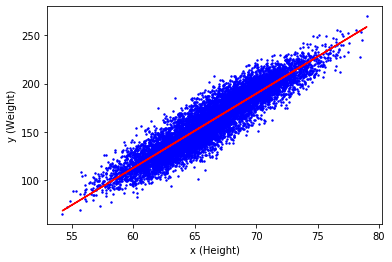

In [ ]:
regression_line(x=df['Height'], y=df['Weight'], theta=estimate_coefficients(x=df['Height'], y=df['Weight']))